# Smith 06 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 

## Models

In [2]:
def single_state(perturbation_schedule, A=0.99, B=0.013):
    '''
    Single state model: x(n+1) = A * x(n) + B * e(n)

    INPUTS:
    perturbation_schedule: schedule of perturbation 
    A: learning rate 
    B: forgetting rate 

    OUTPUTS:
    Visualize of model results 
    '''

    # ICs
    x = 0 
    adaptation = [x] 
    for perturbation in perturbation_schedule:
        # error 
        if np.isnan(perturbation):
            er = 0 
        else : 
            er = perturbation - x 
        # adapatation 
        adaptation.append(A * x + B * er)
        # update 
        x = adaptation[-1]
    
    # visualize 
    plt.figure(figsize=(12,6))
    plt.plot(perturbation_schedule, linewidth=2)
    if sum(np.isnan(perturbation_schedule)) > 0:
        idx = np.argwhere(np.isnan(perturbation_schedule) == 1)
        plt.plot(idx, np.zeros(shape=(len(idx),)), linestyle='--', linewidth=2, color='tab:blue')
    plt.plot(adaptation, linewidth=2, label='Net')
    plt.xlabel('Trial #')
    plt.ylabel('Adaptation')
    plt.legend(loc='best')
    plt.title('Single-state Model')
    plt.show()

In [3]:
def gain_model(perturbation_schedule, A=0.99, B = 0.013):
    '''
    Gain specific model 
        x1(n+1) = min(0, [A * x_1(n) + B * e(n)])
        x2(n+1) = max(0, [A * x_2(n) + B * e(n)])
        x = x_1 + x_2
    
    INPUTS:
    perturbation_schedule: perturbation schedule 
    A: forgetting rate 
    B: learning rate 

    OUTPUT:
    Visualization of model for perturbation schedule
    '''

    x_1 = 0 
    x_2 = 0 
    up = [x_1]
    down = [x_2]
    net = [x_1 + x_2]
    for perturbation in perturbation_schedule:
        # error 
        if np.isnan(perturbation):
            er = 0
        else : 
            er = perturbation - (x_1 + x_2)
        # up state 
        up.append(np.max([0, A * x_1 + B * er]))
        # down state 
        down.append(np.min([0, A * x_2 + B * er]))
        # net 
        net.append(up[-1] + down[-1])
        # update 
        x_1 = up[-1] 
        x_2 = down[-1]

    plt.figure(figsize=(12,6))
    plt.plot(perturbation_schedule, linewidth=2)
    if sum(np.isnan(perturbation_schedule)) > 0:
        idx = np.argwhere(np.isnan(perturbation_schedule) == 1)
        plt.plot(idx, np.zeros(shape=(len(idx),)), linestyle='--', linewidth=2, color='tab:blue')
    plt.plot(net, linewidth=2, label='Net')
    plt.plot(up, linestyle='--', linewidth=2, label='Up')
    plt.plot(down, linestyle='--', linewidth=2, label='Down')
    plt.xlabel('Trial #')
    plt.ylabel('Adaptation')
    plt.title('Gain-Specific Model')
    plt.legend(loc=0)
    plt.show()

In [4]:
def multi_rate(perturbation_schedule, A_f=0.92, A_s=0.996, B_f=0.03, B_s=0.004):
    '''
    Multi-rate model 
    x_1(n+1) = A_f * x_1(n) + B_f * e(n)
    x_2(n+1) = A_s * x_2(n) + B)s * e(n)

    INPUTS:
    perturbation_schedule: perturbation schedule 
    A_f: learning rate (fast)
    A_s: learning rate (slow)
    B_f: forgetting rate (fast)
    B_s: forgetting rate (slow)

    OUTPUT:
    Visualize of model predictions of perturbation schedule with given parameters
    '''

    x_1 = 0
    x_2 = 0
    fast = [x_1]
    slow = [x_2]
    net = [fast[-1]+slow[-1]]
    for perturbation in perturbation_schedule:
        # error 
        if np.isnan(perturbation):
            er = 0 
        else:
            er = perturbation - net[-1]
        # fast 
        fast.append(A_f * x_1 + B_f * er)
        # slow 
        slow.append(A_s * x_2 + B_s * er)
        # net 
        net.append(fast[-1] + slow[-1])
        # update 
        x_1 = fast[-1]
        x_2 = slow[-1]

    plt.figure(figsize=(12,6))
    plt.plot(perturbation_schedule, linewidth=2)
    if sum(np.isnan(perturbation_schedule)) > 0:
        idx = np.argwhere(np.isnan(perturbation_schedule) == 1)
        plt.plot(idx, np.zeros(shape=(len(idx),)), linestyle='--', linewidth=2, color='tab:blue')
    plt.plot(net, linewidth=2, label='Net')
    plt.plot(slow, linestyle='--', linewidth=2, label='Slow')
    plt.plot(fast, linestyle='--', linewidth=2, label='Fast')
    plt.xlabel('Trial #')
    plt.ylabel('Adaptation')
    plt.title('Multi-Rate Model')
    plt.legend(loc=0)
    plt.show()

## Perturbation Schedules

In [5]:
# typical paradigm
sched1 = np.zeros(shape=(800,))
sched1[50:401] = 1
sched1[401:426] = -1
sched1[426:800] = 1

In [6]:
# washout paradigm 
sched2 = np.zeros(shape=(900,))
sched2[50:401] = 1
sched2[401:426] = -1
sched2[601:900] = 1

In [7]:
# no re-learning 
sched3 = np.zeros(shape=(800,))
sched3[50:401] = 1
sched3[401:426] = -1
sched3[426:800] = np.nan # clamp

In [8]:
# washout paradigm 
sched4 = np.zeros(shape=(900,))
sched4[50:401] = 1
sched4[401:426] = -1
sched4[426:601] = np.nan
sched4[601:900] = 1

## Testing Models and Perturbation Schedules

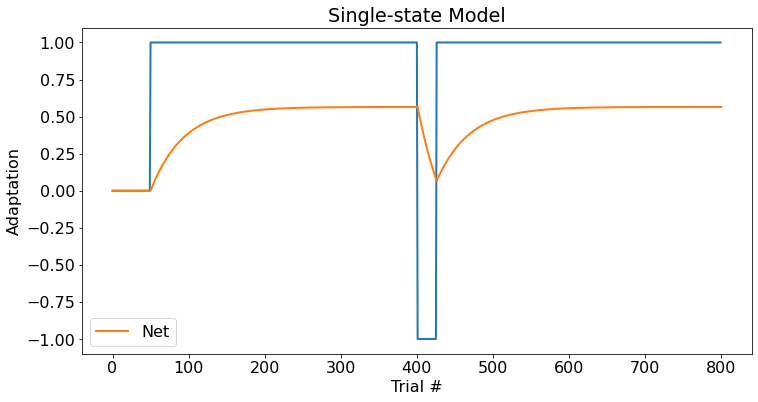

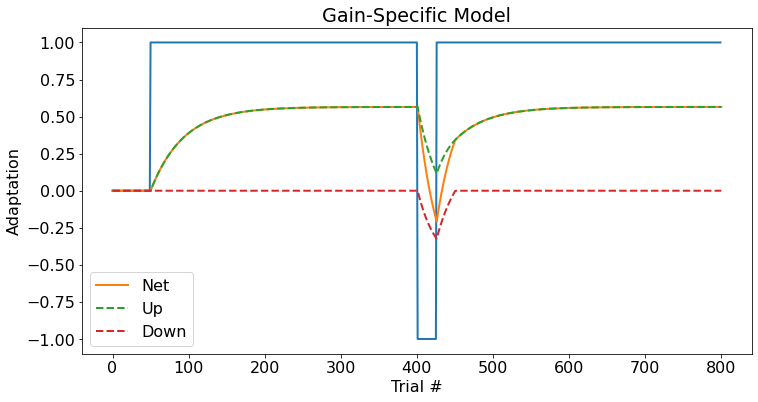

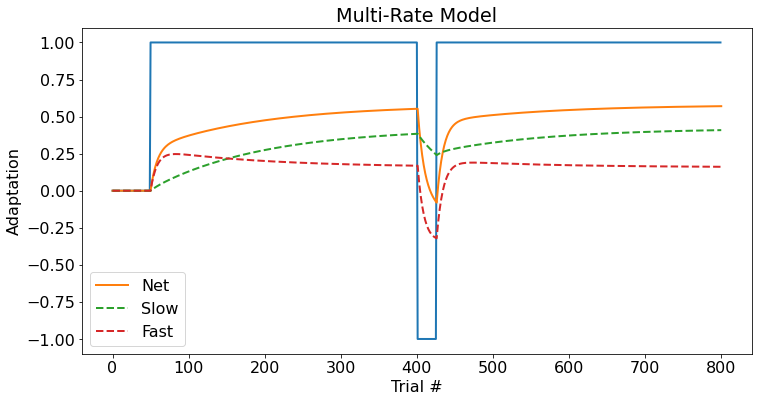

In [9]:
single_state(sched1)
gain_model(sched1)
multi_rate(sched1)

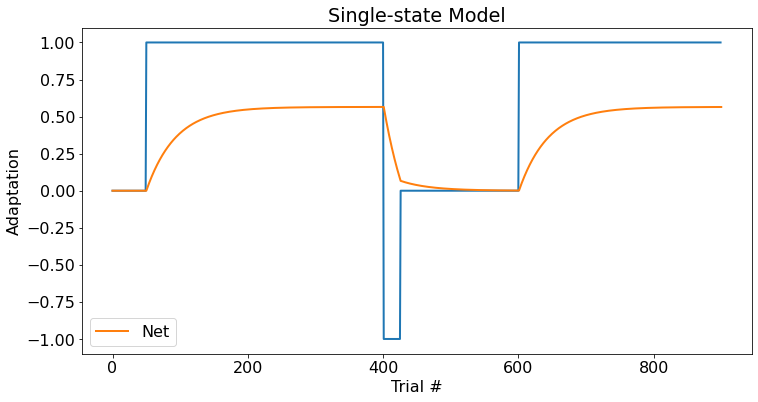

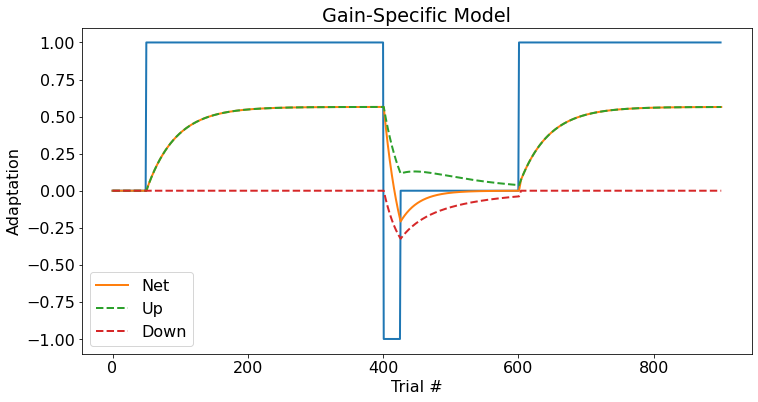

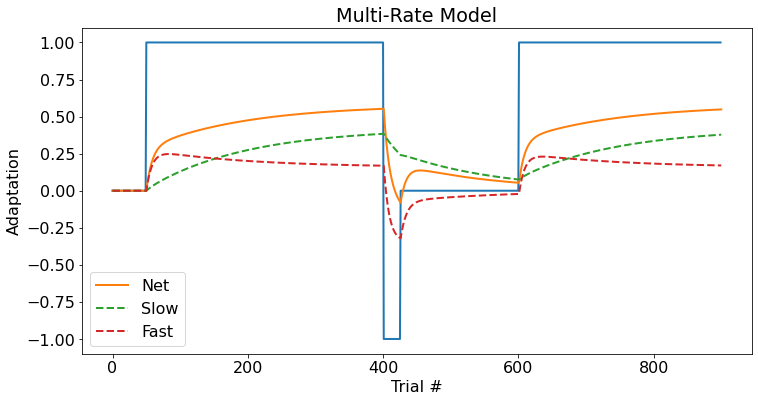

In [10]:
single_state(sched2)
gain_model(sched2)
multi_rate(sched2)

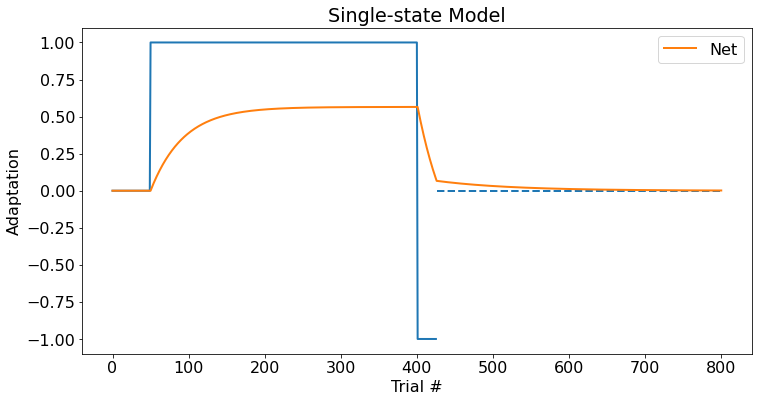

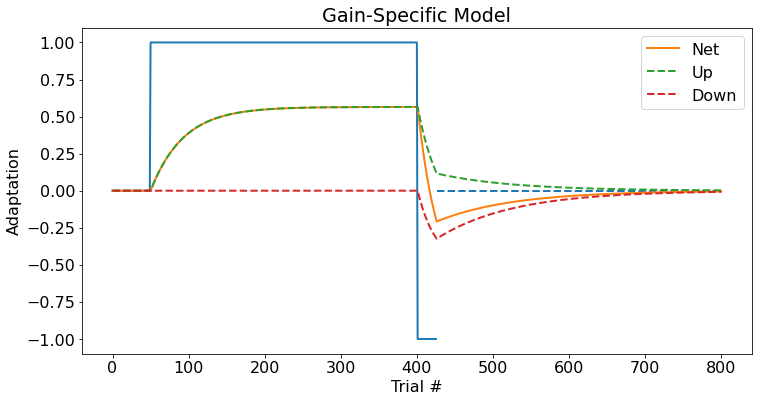

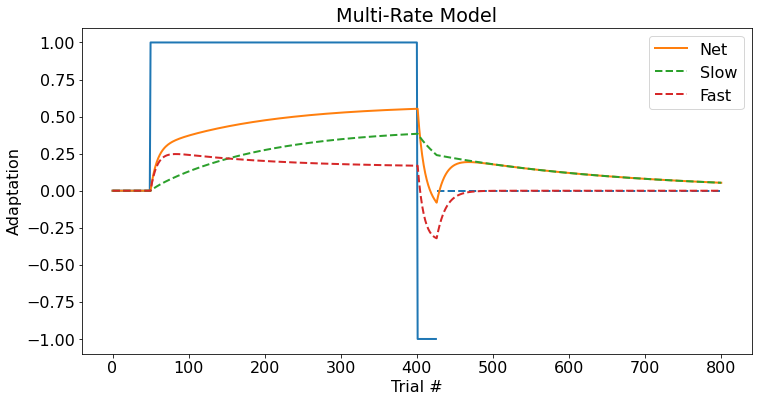

In [11]:
single_state(sched3)
gain_model(sched3)
multi_rate(sched3)

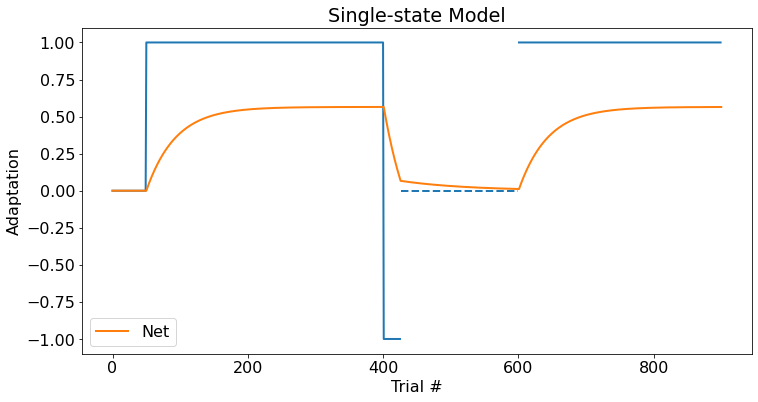

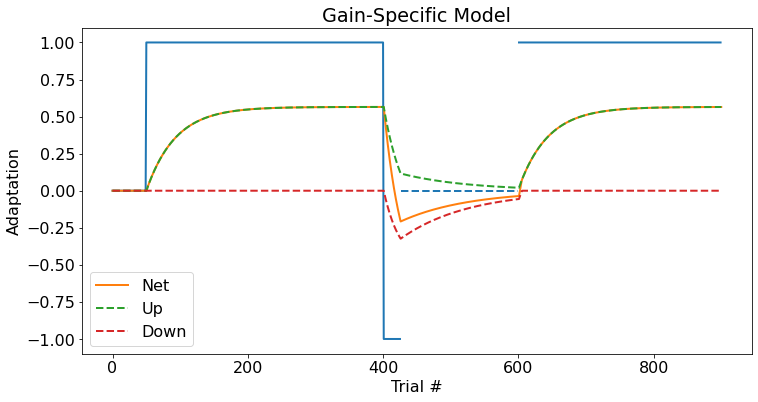

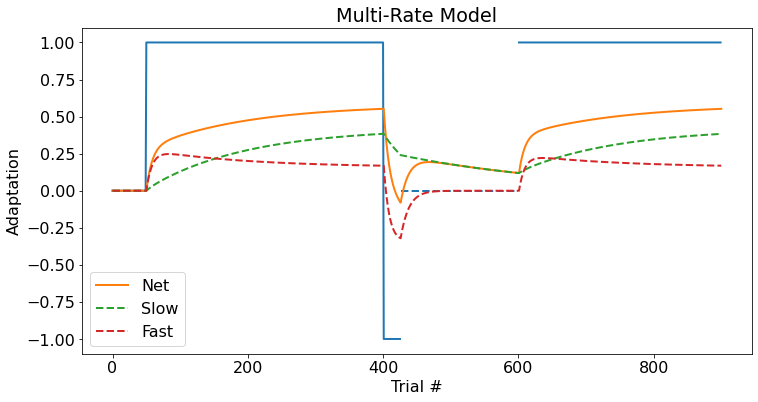

In [12]:
single_state(sched4)
gain_model(sched4)
multi_rate(sched4)